



# Project: Investigate a Dataset - [TMDb movie data]

Table of Contents <br>
Introduction<br>
Data Wrangling<br>
Exploratory Data Analysis<br>
Conclusions<br>

## Introduction

>TMDb (an abbreviation of Internet Movie Database) is an online database of information related to films, television series, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews. 

## Data Set
>This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

## Reserch Questions

1. What is the Average budget cost for a movie from 1970 - 2020 and has there been an upward trend
2. Does the budget of a movie have effects on other variables as revenue, popularity, and actors




In [2]:
# Importing the The required Modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import dates as dtt
from datetime import datetime, timedelta
from scipy import stats
# import statsmodels.graphics.api as smg
# import statsmodels.api as sm
plt.style.use('seaborn')
%matplotlib inline

C:\Users\hp\AppData\Local\Temp\ipykernel_10184\4277356696.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
#  Importing the Dataset 
df_movies = pd.read_csv("C:/Users/hp/Downloads/tmdb-movies.csv"
                        ,parse_dates = ['release_date','release_year'])

#setting the maxium number of columns
pd.set_option('display.max_columns' ,100)

df_movies.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015-01-01,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015-01-01,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015-01-01,1.012000e+08,2.716190e+08


# Data Wranging

## Searching for missing values

>Missing values are reperesented differently for different coloumns across different data sets. 
The Tmdb data set has its empty values represented as null values 
Because most columns are independent of one another, New_data frames will be generated as required for each investigaton

In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

The 'Id' and imdb_id Columns are not required for the analysis of the data as Pandas generates an index

In [5]:
#-- Droping the 'id' and 'Imdb' id columns from the dataframe
#droping the homepage coloumn as its not required for this analysis session
df_movies.drop(columns= ['id','imdb_id'],inplace = True)

In [6]:
# Checking for null values 
df_movies.isna().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
#--First we Clean the dataframe called df
#--This is copy of the original dataframe df_movies
df_budget = df_movies.copy()

Movies can have budgets and revenues value of zero, this is possible as movies can make losses and earn no revenue and also movies can be made without a budget and make some revenue, for consistency rows where budget and revenue are reported as zero wil be dropped as they are no relevant to this analysis

In [8]:
#--check the dataset columns for null values
df_budget['budget'].isna().sum()

0

In [9]:
df_budget['revenue'].isna().sum()

0

In [10]:
#-- Drop the rows where budget and revenue columns are zero
_c =(df_budget.revenue == 0) & (df_budget.budget == 0)
df_budget[_c].head(2)
df_budget.drop(index = df_budget[_c].index, inplace = True)

In [11]:
#-- Sorting index by the release date column
df_budget= df_budget.sort_values(by = 'release_date',ascending = False)

#-- Setting the maximum number of rows viewed at ato 100
pd.set_option('display.max_rows' ,100)

In [12]:
#Creating a Groupby object for Dates in the dataset
# Group by year
#_mn is a group by object
_mn = df_budget.groupby(df_budget['release_date'].dt.year)

In [13]:
#checking for Dulpcates
df_budget.duplicated().isna().sum()

0

>The dataset has in the release year column values missing from 2020 to 2050

In [14]:
#Create a Filter for the range of dates
#from 1970 to 2021
df_budget[(df_budget['release_date'] > '1970-12-31') & (df_budget['release_date'] < '2021-1-1')].head(2)

,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
144,1.125239,8000000,3759286,Anomalisa,Jennifer Jason Leigh|David Thewlis|Tom Noonan,http://www.anomalisa.com/,Duke Johnson|Charlie Kaufman,NaN,sex|depression|existentialism,A man crippled by the mundanity of his life ex...,90,Animation|Comedy|Drama|Romance,Starburns Industries,2015-12-30,259,6.7,2015-01-01,7.359997e+06,3.458542e+06
15,5.898400,44000000,155760117,The Hateful Eight,Samuel L. Jackson|Kurt Russell|Jennifer Jason ...,http://thehatefuleight.com/,Quentin Tarantino,No one comes up here without a damn good reason.,bounty hunter|wyoming|mountains|hangman|voice ...,Bounty hunters seek shelter from a raging bliz...,167,Crime|Drama|Mystery|Western,Double Feature Films|The Weinstein Company|Fil...,2015-12-25,2389,7.4,2015-01-01,4.047998e+07,1.432992e+08


# Data Analysis

>The Analysis Involves taking the average of the Budget cartegory at 5 year intervals of a period of 50 years from 1970 to 2020
and this will be used to analyze its corolation with time

>Analyazing the Budget and revenue column 

In [15]:
#Creating a list of budget values
pd.DataFrame(df_budget.budget.describe()).style.format('{0:,.0f}')

,budget
count,"6,165"
mean,"25,778,243"
std,"37,375,124"
min,0
25%,"1,700,000"
50%,"12,000,000"
75%,"33,000,000"
max,"425,000,000"


In [16]:
def format_number1(data_value,idx):
    '''
    This Function takes a list of int or float values with high
    exponential and converts them to string forrmat
    example 1,000,000 to 1M , where 'M' is millon 
    '''
    
    if  (data_value >= 1000000.00) & (data_value < 1000000000.00):
        formatter = '{:.1f}M'.format(data_value*0.000001)
        return formatter
    elif (data_value >= 1000.00) & (data_value < 1_000_000.00):
        formatter = '{:.1f}K'.format(data_value*0.001)
        return formatter
    elif data_value == 0:
        formatter = 0
        return formatter
    else: pass
        
        

skewness =  2.8316009872695145


,budget
count,"6,165"
mean,"25,778,243"
std,"37,375,124"
min,0
25%,"1,700,000"
50%,"12,000,000"
75%,"33,000,000"
max,"425,000,000"


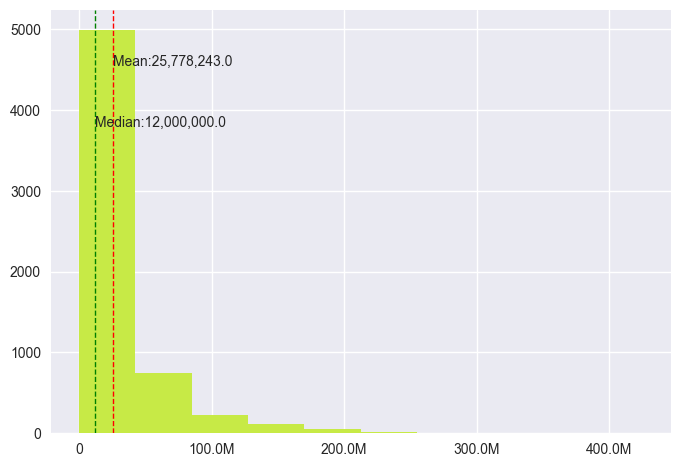

<Figure size 1400x1000 with 0 Axes>

In [17]:
fig, ax = plt.subplots();

ax.xaxis.set_major_formatter(
    plt.FuncFormatter(format_number1)); #setting the format for t

plt.figure(figsize = [14,10]); #figure size

ax.hist(df_budget['budget'], color = '#C7EA46');

ax.axvline(df_budget['budget'].mean(),    # plotting the mean line
           color = 'red', linestyle = '--', linewidth = 1);

ax.axvline(df_budget['budget'].median(), # plotting the median line
           color = 'green', linestyle = '--', linewidth = 1);

ax.text(df_budget['budget'].mean(),4550,     #postions and cordinates
        'Mean:{:,.1f}'.format(df_budget['budget'].mean()));

ax.text(df_budget['budget'].median(),3800, #postions and cordinates
        'Median:{:,.1f}'.format(df_budget['budget'].median()));

print('skewness = ',df_budget['budget'].skew())
pd.DataFrame(df_budget['budget'].describe()).style.format('{0:,.0f}')

The Data is skewed to the right with 75% of movies with budget less than 40 millon and the maximunm budget of a movie within this period is 425 millon

,budget
count,"6,165"
mean,"25,778,243"
std,"37,375,124"
min,0
25%,"1,700,000"
50%,"12,000,000"
75%,"33,000,000"
max,"425,000,000"


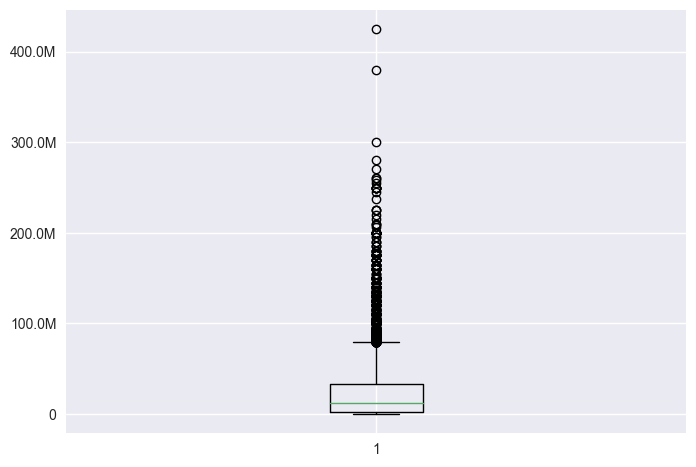

<Figure size 1000x800 with 0 Axes>

In [18]:
fig, ax = plt.subplots();

ax.yaxis.set_major_formatter(
    plt.FuncFormatter(format_number1));

plt.figure(figsize = [10,8]);

ax.boxplot(df_budget['budget']);

pd.DataFrame(
    df_budget['budget'].describe()).style.format('{0:,.0f}')


The Box plots shows the mean as indicated by the blue line, and also alot of outliers

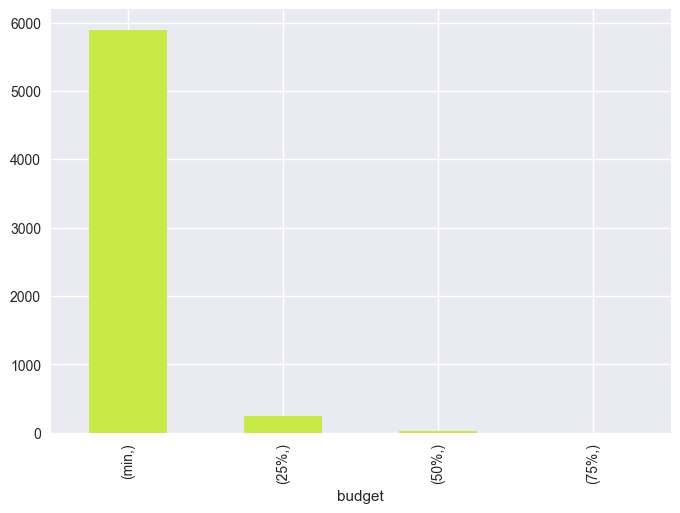

In [19]:
labels = ['min','25%','50%', '75%']  
_x = pd.cut(df_budget['budget'],4,  
            labels = labels,
            include_lowest = True, retbins = True)

df_f1 = pd.DataFrame(_x[0])

df_f1.value_counts().plot(kind = 'bar',  color = '#C7EA46')

df_f1 = pd.DataFrame(df_budget.value_counts())
df_f1.reset_index(inplace = True)

df_f1.rename(columns ={0: 'counts'}, inplace =True)


> The budget is skewed to the right with majority of values being below 25%. The mean is not a proper represetative of the budget as 4903 movies fall below 25th perecentile 244 movie budget fall below the 50th percentile. The median is a better representaive of the data

,revenue
count,"6,165"
mean,"70,189,812"
std,"148,319,406"
min,0
25%,"118,483"
50%,"16,549,477"
75%,"71,441,250"
max,"2,781,505,847"


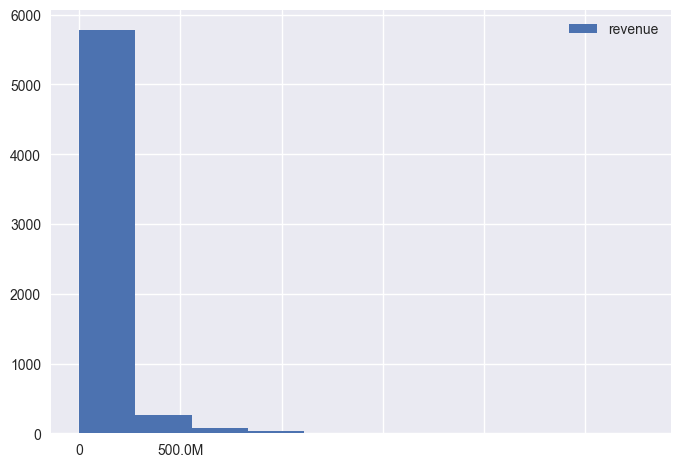

In [20]:
#plotting the revenue over the budget
fig, ax = plt.subplots()
ax.hist( df_budget['revenue'], label = 'revenue')
ax.xaxis.set_major_formatter(
    plt.FuncFormatter(format_number1));

ax.legend()

pd.DataFrame(df_budget['revenue'].describe()).style.format('{0:,.0f}')

The revenue data is also skewed with the 75 percentile at 71 million and te max value being at 2 billon

In [21]:
#making the release_date the index of the dataframe
df_budget.set_index('release_date', inplace = True)


In [22]:
#Creating search date ranges for slicing the date_release index
# generating dates at 5 year intervals

_AT = pd.date_range(start = '1/1/1970',end = '31/1/2020' , normalize = True, freq = '5y') 

_BT = pd.date_range(start = '1/1/1974', end = '31/12/2020',freq ='5y', normalize = True)

_AT, _BT

C:\Users\hp\AppData\Local\Temp\ipykernel_10184\2116951105.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _AT = pd.date_range(start = '1/1/1970',end = '31/1/2020' , normalize = True, freq = '5y')
C:\Users\hp\AppData\Local\Temp\ipykernel_10184\2116951105.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _BT = pd.date_range(start = '1/1/1974', end = '31/12/2020',freq ='5y', normalize = True)


(DatetimeIndex(['1970-12-31', '1975-12-31', '1980-12-31', '1985-12-31',
                '1990-12-31', '1995-12-31', '2000-12-31', '2005-12-31',
                '2010-12-31', '2015-12-31'],
               dtype='datetime64[ns]', freq='5A-DEC'),
 DatetimeIndex(['1974-12-31', '1979-12-31', '1984-12-31', '1989-12-31',
                '1994-12-31', '1999-12-31', '2004-12-31', '2009-12-31',
                '2014-12-31', '2019-12-31'],
               dtype='datetime64[ns]', freq='5A-DEC'))

> Datetime format is represented as strings in index slicing , so casting the datetime list to Strings to slice date range

In [23]:
#for Slicing time index the data type has to be string
#convert to Strings
A = _AT.astype(str)
B = _BT.astype(str)


>Using the for loops to loop through seach indexs at 5year intervals and computing the mean

In [24]:
# A & B are time slices
budget_list = []    #List to Hold the mean Values
for i in range(10): 
    ilist = df_budget[A[i]:B[i]]['budget'].mean()
    budget_list.append(ilist) #get the mean budget for a certain time period
             
revenue_list = []    #List to Hold the mean Values
for i in range(10): 
    ilist = df_budget[A[i]:B[i]]['revenue'].mean()
    revenue_list.append(ilist) #get the mean budget for a certain time period
             

C:\Users\hp\AppData\Local\Temp\ipykernel_10184\1170274870.py:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ilist = df_budget[A[i]:B[i]]['budget'].mean()
C:\Users\hp\AppData\Local\Temp\ipykernel_10184\1170274870.py:9: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ilist = df_budget[A[i]:B[i]]['revenue'].mean()


Time Range
> The range of Dates from 1970 t0 2015 with 5 year intervals the average of movie budget spend across each interval is caluculated and plotted against time, were no entries from 2020 to 2060.  

In [25]:
_D = {
    'Dates': _AT,
    'Average_mean' : budget_list,
    'Average_revenue': revenue_list
    }
df_average = pd.DataFrame(_D)

> The appliction of the fuction to generate a list of corresponding values for the Y axis of the data plot

,Dates,Average_mean,Average_revenue
0,1970-12-31 00:00:00,"2,663,284","37,779,867"
1,1975-12-31 00:00:00,"6,281,857","50,724,062"
2,1980-12-31 00:00:00,"9,074,327","40,423,365"
3,1985-12-31 00:00:00,"9,685,535","43,539,257"
4,1990-12-31 00:00:00,"16,870,327","60,573,984"
5,1995-12-31 00:00:00,"34,317,475","73,056,061"
6,2000-12-31 00:00:00,"35,689,245","85,816,549"
7,2005-12-31 00:00:00,"29,797,432","73,548,310"
8,2010-12-31 00:00:00,"27,563,813","77,919,043"
9,2015-12-31 00:00:00,nan,nan


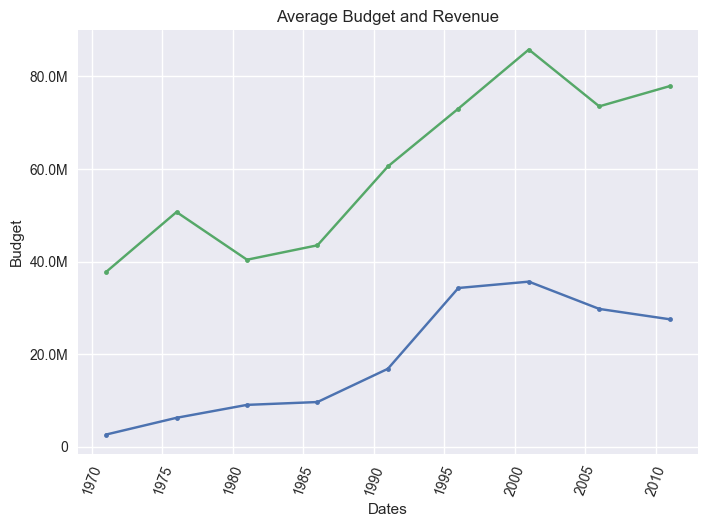

In [26]:
##ploting the time series data
#creating plot obeject from matplotlib

fig, ax = plt.subplots();
ax.plot(_AT, budget_list, marker = '.');
ax.plot(_AT, revenue_list, marker = '.');

ax.yaxis.set_major_formatter(
    plt.FuncFormatter(format_number1));

ax.set_xlabel('Dates');
ax.set_ylabel('Budget');
ax.set_title('Average Budget and Revenue');
plt.xticks(rotation = 70);
df_average.style.format({'Average_mean':'{0:,.0f}','Average_revenue':'{0:,.0f}'})


There is an upward trend in average movies over the time period of 1970 - 2010, with a very high value in the period of 2000 - 2005 where the average budget was over 38 millon.

,Dates,Average_mean,Average_revenue
0,1970-12-31 00:00:00,"2,663,284","37,779,867"
1,1975-12-31 00:00:00,"6,281,857","50,724,062"
2,1980-12-31 00:00:00,"9,074,327","40,423,365"
3,1985-12-31 00:00:00,"9,685,535","43,539,257"
4,1990-12-31 00:00:00,"16,870,327","60,573,984"
5,1995-12-31 00:00:00,"34,317,475","73,056,061"
6,2000-12-31 00:00:00,"35,689,245","85,816,549"
7,2005-12-31 00:00:00,"29,797,432","73,548,310"
8,2010-12-31 00:00:00,"27,563,813","77,919,043"
9,2015-12-31 00:00:00,nan,nan


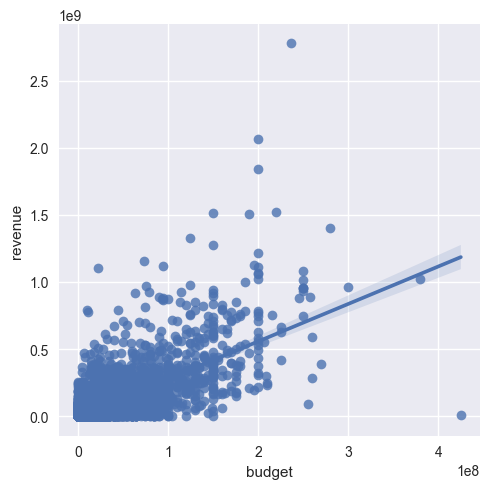

In [27]:
#ploting a scatter plot between revenue and budget
sns.lmplot(x='budget', y= 'revenue', data = df_budget)
cor = stats.pearsonr(df_budget['budget'], df_budget['revenue'])


df_average.style.format({'Average_mean':'{0:,.0f}','Average_revenue':'{0:,.0f}'})


There is a strong positive relationship between budget and revenue, the variables are releated and interdependent, 

In [28]:
Am = df_budget['popularity'].isna().sum()
Am

0

In [29]:
# The Average popularity voted by viewers at 5 year intervaLs
popularity_list = []    #List to Hold the mean Values
for i in range(10): 
    ilist = df_budget[A[i]:B[i]]['popularity'].mean()
    popularity_list.append(ilist) #get the mean budget for a certain time period

C:\Users\hp\AppData\Local\Temp\ipykernel_10184\721177544.py:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ilist = df_budget[A[i]:B[i]]['popularity'].mean()


In [30]:
_pop = {
    'Dates': A,
    'Ratings': popularity_list
}

,Dates,Ratings
0,1970-12-31,0.681437
1,1975-12-31,0.762003
2,1980-12-31,0.675679
3,1985-12-31,0.630108
4,1990-12-31,0.709654
5,1995-12-31,0.798216
6,2000-12-31,0.933471
7,2005-12-31,0.831886
8,2010-12-31,1.113150
9,2015-12-31,NaN


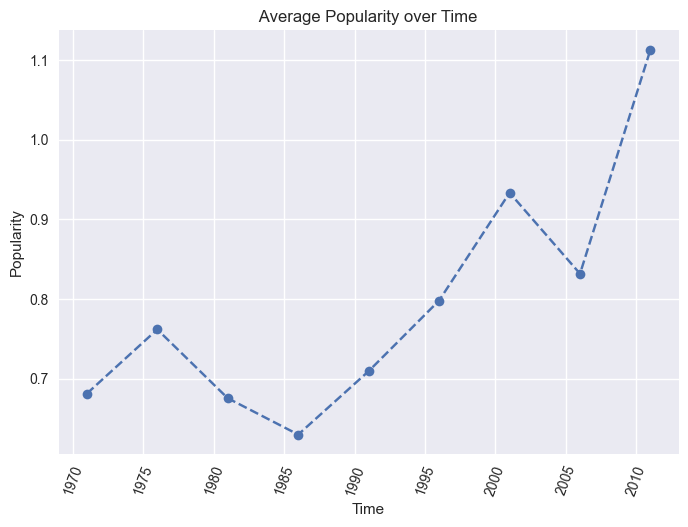

In [31]:
fig , ax = plt.subplots();
ax.plot_date(_AT, popularity_list, linestyle = '--');
plt.xticks(rotation = 70);
ax.set_title(' Average Popularity over Time ');
ax.set_ylabel('Popularity');
ax.set_xlabel('Time');
pd.DataFrame(_pop)

This Chart measure the average ppularity of movies at a 5 year interval, with movies ratings having an upward trend with tim, with an all time high at 2010   

In [32]:
_pop1 = {
    'Dates': A,
    'Ratings': popularity_list,
    'Average_revenue' : revenue_list
}

,Dates,Ratings,Average_revenue
0,1970-12-31,0.681437,"37,779,867"
1,1975-12-31,0.762003,"50,724,062"
2,1980-12-31,0.675679,"40,423,365"
3,1985-12-31,0.630108,"43,539,257"
4,1990-12-31,0.709654,"60,573,984"
5,1995-12-31,0.798216,"73,056,061"
6,2000-12-31,0.933471,"85,816,549"
7,2005-12-31,0.831886,"73,548,310"
8,2010-12-31,1.113150,"77,919,043"
9,2015-12-31,nan,nan


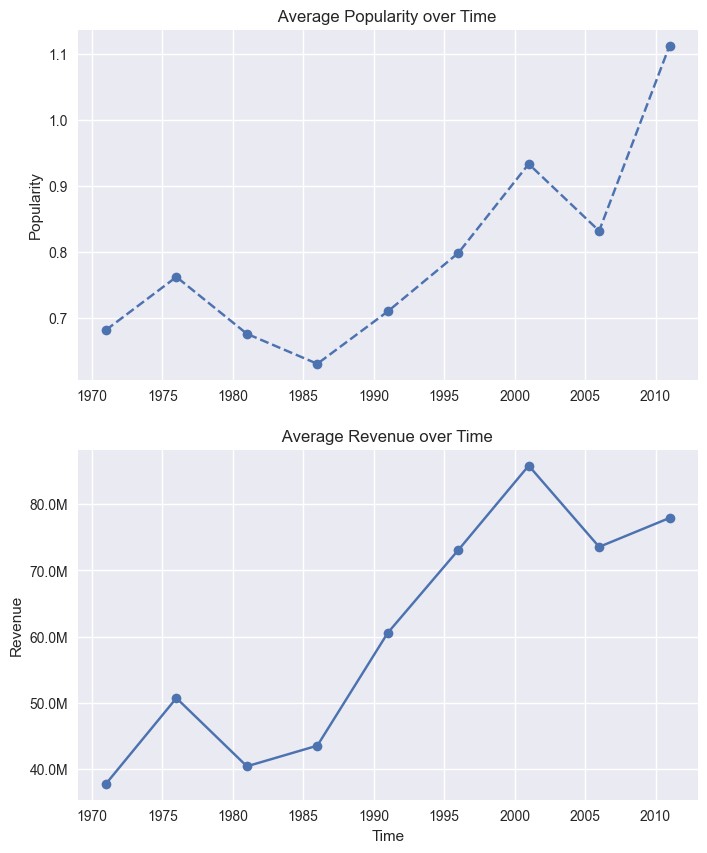

In [53]:
#Creating a subplots object
fig, (ax, ax1) = plt.subplots(nrows = 2, ncols = 1);
ax.plot_date(_AT, popularity_list, linestyle = '--');
ax1.plot_date(_AT, revenue_list, linestyle = '-')

#setting the figure size
fig.set_figheight(10)
fig.set_figwidth(8)

#fig 1 title and labels
ax.set_title(' Average Popularity over Time ');
ax.set_ylabel('Popularity');

#fig 2 title and labels
ax1.set_title(' Average Revenue over Time ');
ax1.set_ylabel('Revenue');
ax1.set_xlabel('Time');
ax1.yaxis.set_major_formatter(
    plt.FuncFormatter(format_number1));


#Tables
pd.DataFrame(_pop1).style.format({'Average_revenue': '{0:,.0f}'})

This Chart measure the average ppularity of movies at a 5 year interval, with movies ratings having an upward trend with time, popularity and revenue   

PearsonRResult(statistic=0.6432490192352093, pvalue=0.0)


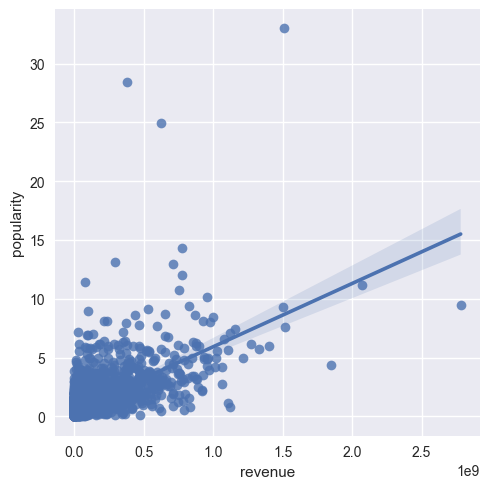

In [34]:
#does a corolation exist between popularity and budget
sns.lmplot(x= 'revenue', y= 'popularity', data = df_budget )
cor = stats.pearsonr(df_budget['revenue'], df_budget['popularity'])
print(cor)

There is a positive relationship between popularity and Budget, the variables are releated and interdependent, but corelation does not mean causality. The popularity of a movie has an effect on the revenue genrated

## Research Question 2
>What Genre of movie is the most popular movie genre.

Several movies occurs over multiple genre, for this analysis the genre's will be seperated into individual rows in the Dataframe, each genre will ne grouped togther and the total counts  of each genere wil be calulated. A new dataframe will be create combining all the individual genre rows 


In [35]:
df_budget.reset_index(inplace = True)

In [36]:
#creating Dataframes for each new genre
df1 =df_budget.copy()
df2 =df_budget.copy()
df3 =df_budget.copy()
df4 =df_budget.copy()
df5 =df_budget.copy()
df6 =df_budget.copy()



In [37]:
#Spliting the genre into different columns
df1['genres'] =df_budget['genres'].str.split('|').str.get(0)
df2['genres'] =df_budget['genres'].str.split('|').str.get(1)
df3['genres'] =df_budget['genres'].str.split('|').str.get(2)
df4['genres'] =df_budget['genres'].str.split('|').str.get(3)
df5['genres'] =df_budget['genres'].str.split('|').str.get(4)
df6['genres'] =df_budget['genres'].str.split('|').str.get(5)

#checking for the movies with the most genre 

#converting to list to numpy array

In [38]:
#Concat the  dataFrames 
df_budget = pd.concat([df1,df2,df3,df4,df5,df6], ignore_index = True)

In [39]:
#filter for null values in the genre coloumn
df_budget['genres'].isna().sum()


21023

In [40]:
#investigate null values
filt4 = df_budget['genres'].isna()

In [41]:
#dropping empty rows
df_budget.drop(index = df_budget[filt4].index, inplace = True)

In [42]:
# Extracting the values from the dataframe to plot
df_genre = df_budget['genres'].value_counts().head(5)
#creating a new dataframe 'df_pie'


In [43]:
df_genre = pd.DataFrame(df_genre)


In [44]:
#reseting the index
df_genre.reset_index(inplace = True)

In [45]:
#renaming the data_frame columns
df_genre.rename(columns = {'index' : 'genres', 'genres': 'count'}, inplace = True)

In [46]:
#ploting the bar Chart
categories = df_genre['genres'].tolist()
count = df_genre['count'].tolist()

NameError: name 'df_pie' is not defined

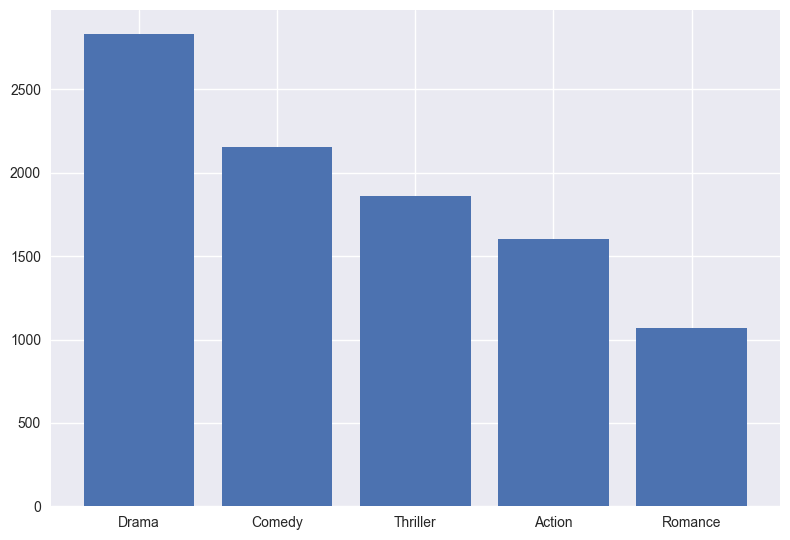

In [47]:
plt.bar(categories,count);
plt.tight_layout()
df_pie.head(5)

> The most Pouplar Tv genre is the Drama Genre, with it being a part in over 2000 movies

# Conclusion

>1. The budget for movies, is postively correlated to the revnue, there is an upward trend over the time period of 1970 - 2010, this trend in budget expendure is reflected by an increase in revenue

>2. Popularity and movie revenue are dependent on each other with a correlational value of 0.64, more popular movies seem to generate more revenue, but there isnt a direct relation ship between budget and popularity. But causation does not imply correlation

>3. Movies genre is seems to be a very important factor in movie revenue, over the time period the movie genre with the highest frequency is 'Drama

## Limitations

>1. The budget and Revenue data are heavily skwed which an effect of the average and mean of budget and revenue over time.

>2. The dataset had a lot of missing entries from 2020 - 2060 limiting the scope of thiS analysis



